In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [44]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<ipython-input-45-d21363e8725d>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Ship Mode'>

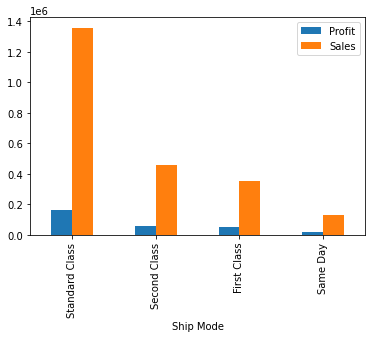

In [45]:
data.groupby('Ship Mode')['Profit','Sales'].sum().sort_values(by ='Sales', ascending = False).plot(kind='bar')

<ipython-input-46-ef4eebd8f738>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Segment'>

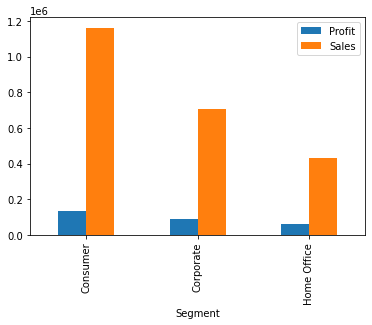

In [46]:
data.groupby('Segment')['Profit','Sales'].sum().sort_values(by ='Sales', ascending = False).plot(kind='bar')

<ipython-input-47-da0de612816f>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Category'>

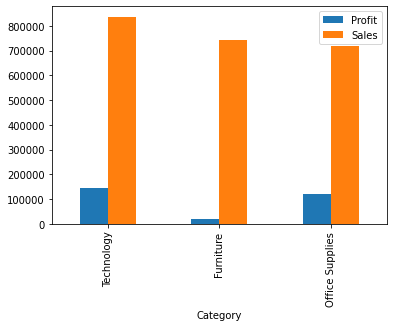

In [47]:
data.groupby('Category')['Profit','Sales'].sum().sort_values(by ='Sales', ascending = False).plot(kind='bar')

<ipython-input-48-85c36b0968a1>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



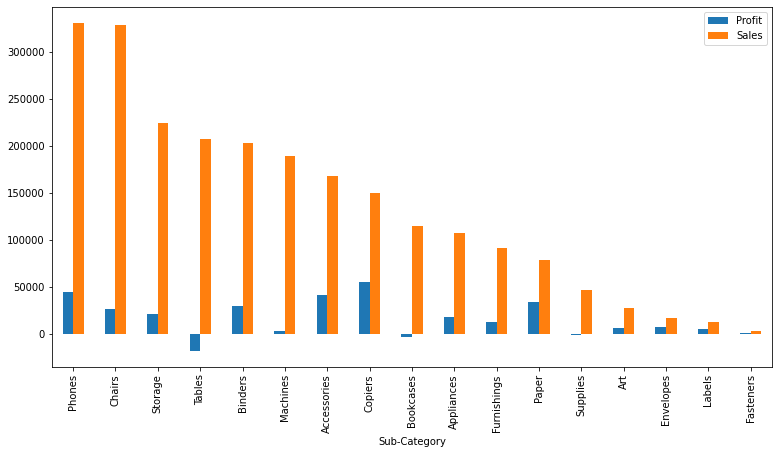

In [48]:
fig= plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
data.groupby('Sub-Category')['Profit','Sales'].sum().sort_values(by ='Sales', ascending = False).plot(kind='bar',ax=ax)

<ipython-input-49-a33ccc871b95>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



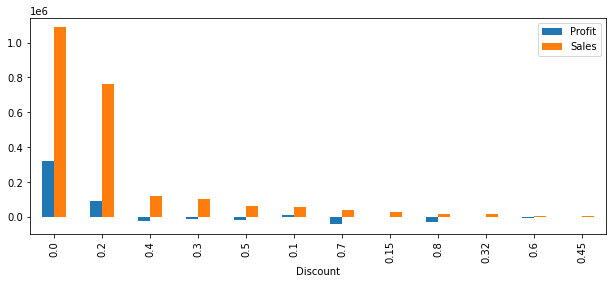

In [49]:
fig= plt.figure(figsize=(8,3))
ax=fig.add_axes([0,0,1,1])
data.groupby('Discount')['Profit','Sales'].sum().sort_values(by ='Sales', ascending = False).plot(kind='bar',ax=ax)

<ipython-input-50-ed6474a79247>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



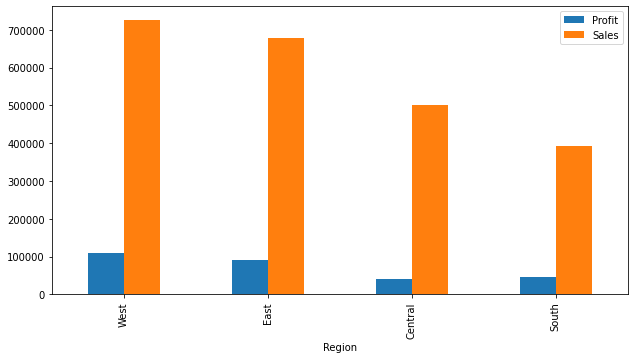

In [50]:
fig= plt.figure(figsize=(8,4))
ax=fig.add_axes([0,0,1,1])
data.groupby('Region')['Profit','Sales'].sum().sort_values(by ='Sales', ascending = False).plot(kind='bar',ax=ax)


<ipython-input-51-d6c6bf3c8afd>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



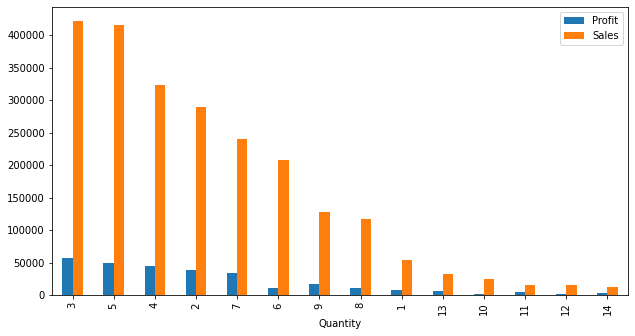

In [51]:
fig= plt.figure(figsize=(8,4))
ax=fig.add_axes([0,0,1,1])
data.groupby('Quantity')['Profit','Sales'].sum().sort_values(by ='Sales', ascending = False).plot(kind='bar',ax=ax)
plt.show()

In [54]:
data.columns.values

array(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit'], dtype=object)

In [55]:
sum(data.duplicated(subset = None, keep = 'first'))

17

In [56]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [57]:
sum(data.duplicated(subset = None, keep = 'first'))

0

In [58]:
def getUnique(data,  target_variable, sort_by, color, threshold_categories = 10):
    total_cols = [i for i in data.columns.values if len(data[i].unique()) <threshold_categories and len(data[i].unique()) > 1]
    fig = plt.figure(figsize = (20,20))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2
    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        data.groupby(i)['Profit','Sales'].sum().sort_values(by = 'Sales', ascending = False).plot(kind='bar',ax=ax)
    plt.tight_layout(pad = 3.0)
    plt.show()

<ipython-input-58-b94847d4fe92>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



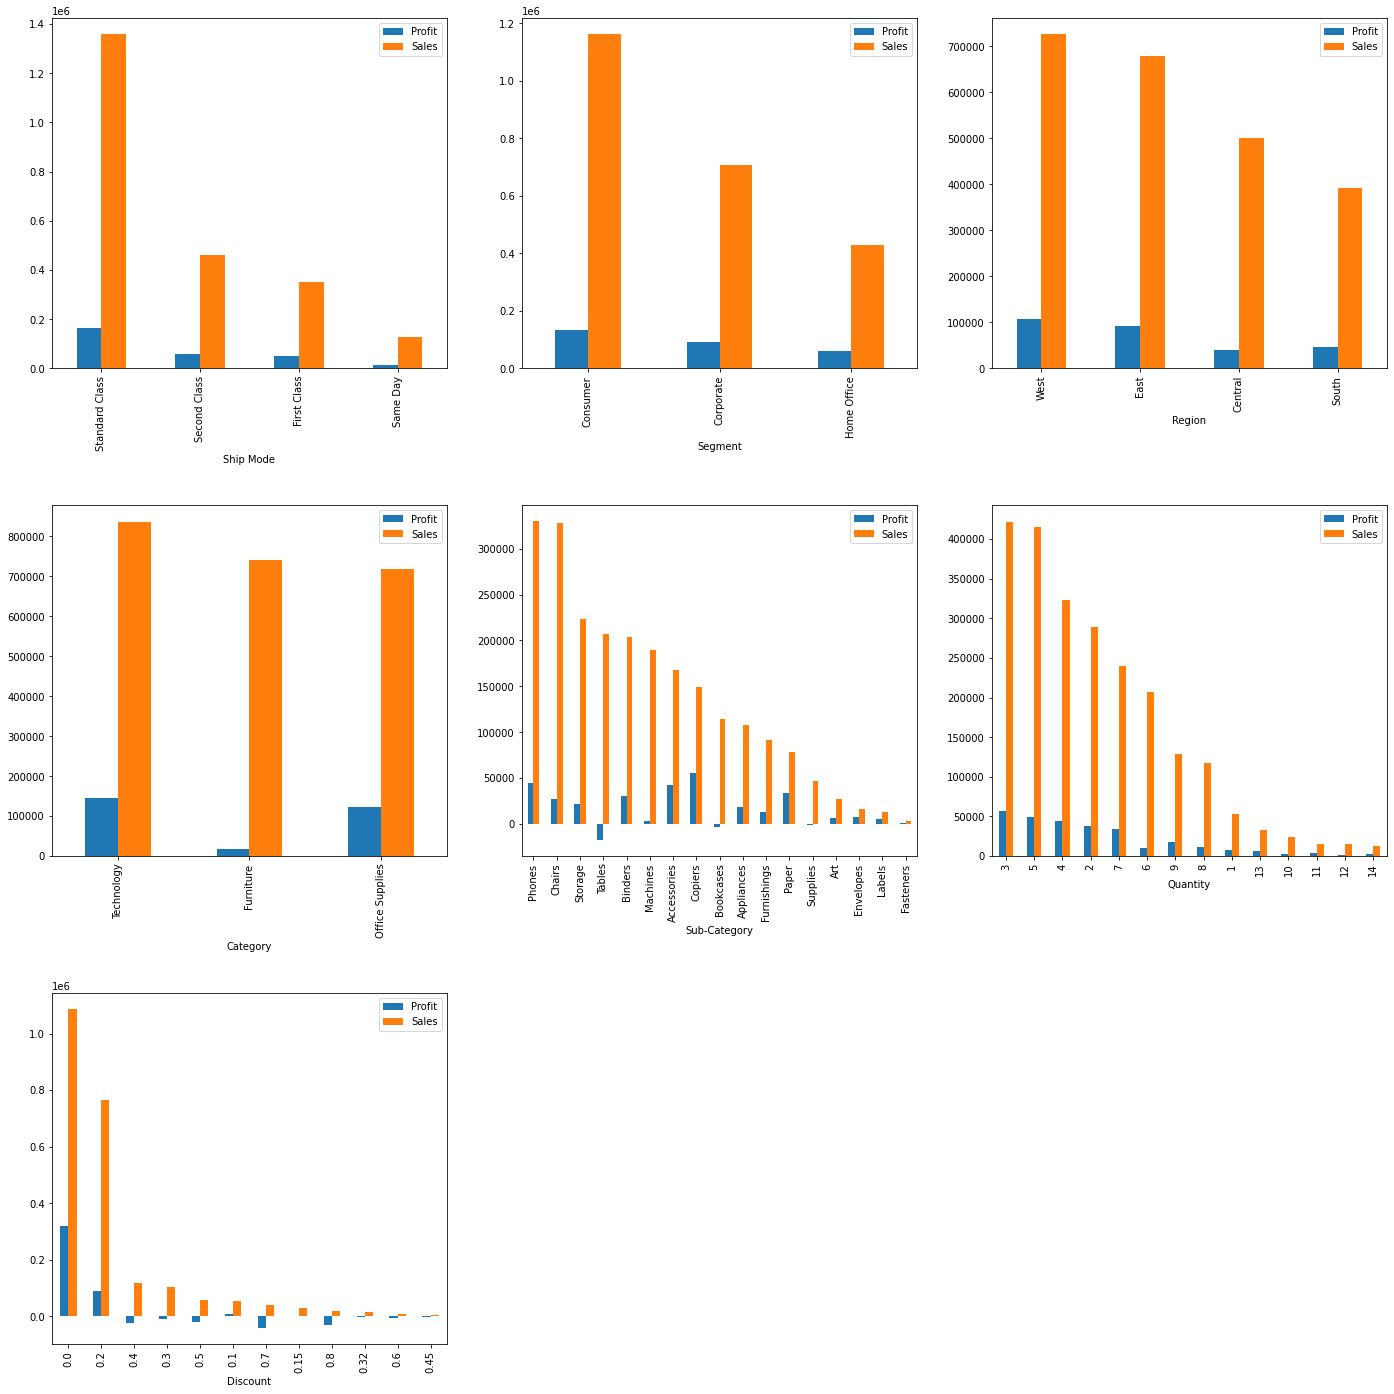

In [59]:
num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["black", "yellow"]
getUnique(data, target_variable, sort_by, color, num_categories)

<ipython-input-60-c66608b232fc>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



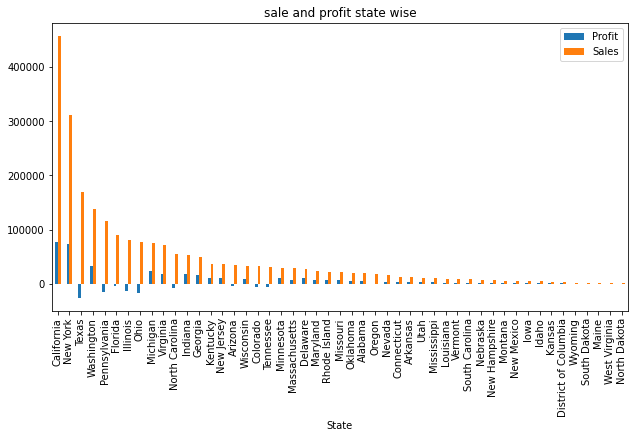

In [60]:
fig= plt.figure(figsize=(8,4))
ax=fig.add_axes([0,0,1,1])
data.groupby('State')['Profit','Sales'].sum().sort_values(by ='Sales', ascending = False).plot(kind='bar',ax=ax)
plt.title('sale and profit state wise')
plt.show()


The state with high sales are generating less profit

In [61]:
data.groupby('State')['Discount'].sum().sort_values(ascending=False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Maryland                  0.60
Delaware                  0.60
Connecticut               0.60
New Jersey                0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Nebraska                  0.00
South Dakota              0.00
Wisconsin                 0.00
Arkansas                  0.00
Di

By comparing the chart and the discount list we get to know that states providing max discount is not gaining any profits

In [62]:
data.groupby('State')['Quantity'].sum().sort_values(ascending=False)

State
California              7649
New York                4220
Texas                   3718
Pennsylvania            2150
Washington              1871
Illinois                1842
Ohio                    1757
Florida                 1379
North Carolina           983
Michigan                 943
Virginia                 893
Arizona                  862
Georgia                  705
Colorado                 693
Tennessee                681
Indiana                  578
Kentucky                 523
Oregon                   497
Massachusetts            491
Wisconsin                463
New Jersey               454
Maryland                 420
Delaware                 367
Minnesota                331
Connecticut              281
Alabama                  256
Missouri                 252
Oklahoma                 247
Arkansas                 240
Mississippi              221
Utah                     219
Rhode Island             199
South Carolina           172
Nevada                   168
Louisian

In [63]:
datast=data.groupby('State')[['Profit','Sales','Discount']].sum().sort_values(by='Discount',ascending=False)

In [64]:
datast[['Discount','Profit']][(datast.Profit<0)]

,Discount,Profit
State,,
Texas,364.24,-25750.9833
Pennsylvania,192.70,-15565.4035
Illinois,191.10,-12601.6500
Ohio,152.10,-16959.3178
Florida,114.65,-3399.3017
North Carolina,70.60,-7490.9122
Arizona,68.00,-3427.9246
Colorado,57.60,-6527.8579
Tennessee,53.30,-5341.6936


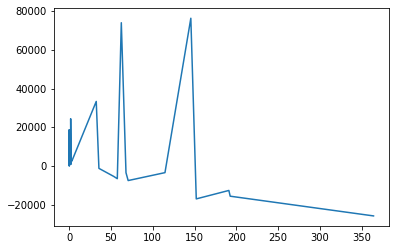

In [65]:
plt.plot(datast['Discount'],datast['Profit'])
plt.show()

<AxesSubplot:>

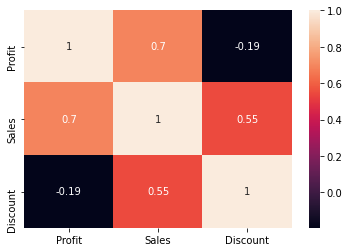

In [67]:
sns.heatmap(datast.corr(),annot=True)

 
Insights Drawn from Analysing the SampleSuperstore data:




1) The profit generated by Office supplies category is more, but the sales for office supplies are less. So, we have to work on increasing the sales for Office Supplies Category

2) The profits for Tables and Bookcases sub-category are very less but the profit for Copiers is very high. So, we should focus on increasing the sales of the copiers

3) The commpany is facing Loss in top 25 states with highest number of sales

4) The states with high Sales are generating less profit due to high discount allowance.

5) Discount and Profit are negatively correlated. When discount increases the profit genrated decreases.